#### Telco customer churn analysis

#### Project Objective 


The objective of this project is to analyze customer churn in a telecommunications company and build a predictive model that identifies customers at high risk of leaving the service.

Using customer demographics, service usage patterns, and billing information, the project applies logistic regression to understand the key drivers of churn and quantify their impact.

Beyond prediction, this project focuses on interpretability—answering practical business questions such as:

Which factors increase or reduce the likelihood of churn?

How can the business act on these insights to improve customer retention?

The ultimate goal is to translate machine learning outputs into actionable business recommendations that can support data-driven decision-making.

#### Importing required librairies

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import warnings
warnings.filterwarnings("ignore")

#### Bringing in the data for analysis/modelling

In [4]:
data = pd.read_csv("Telco_churn.csv")

In [8]:
# Accessing first five rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Assessing number of fields and records. Data has 7043 records and 21 fields
data.shape

(7043, 21)

In [7]:
# Basic statistics of numerical fields
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data cleaning and preparation
 1.  Handling missing values

In [8]:
# Assessing for missing values. There are no missing values in the dataframe
data.isna().sum().sum()

0

#### 2. Examining for duplicate data

In [9]:
# Exploring for duplicates. No duplicates was found
data.duplicated().sum()

0

 #### Fix data types

In [10]:
data.info()
#Data types are consistent with requirements for model building

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Validate target variable

In [11]:
y = data["Churn"]

#### Exploratory Data Analysis (EDA)
 a)  Churn vs non-churn comparison
 

In [38]:
data["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [5]:
## Calculating average tenure
data["tenure"].value_counts().mean()

96.47945205479452

In [8]:
data.groupby("Churn")["tenure"].mean()
# Customers that churned had lower tenure than those that were retained

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [12]:
# Isolating numeric columns
numeric_columns_data = data.select_dtypes( include =["number"])

In [14]:
# Determining correlation among umeric columns
numeric_columns_data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<Axes: >

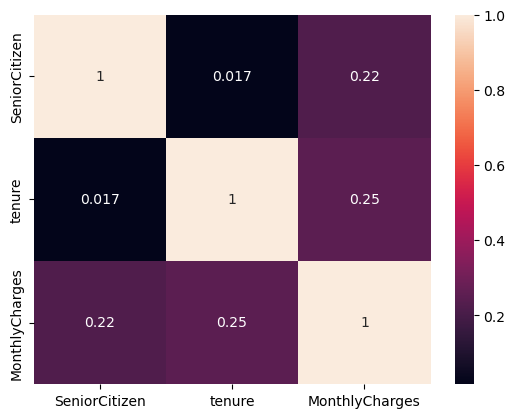

In [15]:
# Plotting correlation among numeric columns
sns.heatmap(data=numeric_columns_data.corr(), annot = True)

In [9]:
# Because the columns (fields) are many, this was done to display all
pd.set_option('display.max_columns', None)
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data visualisation

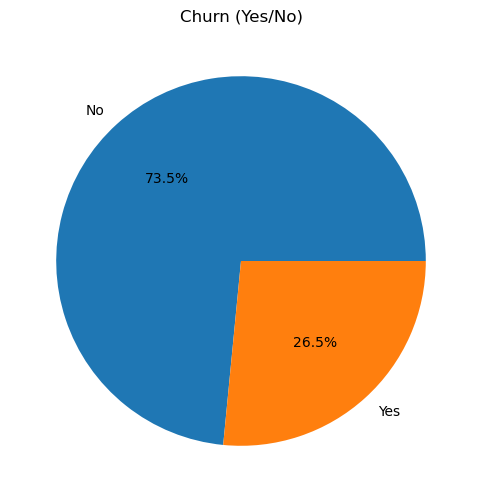

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))  

data["Churn"].value_counts().plot(kind="pie", autopct="%1.1f%%")

plt.title("Churn (Yes/No)")
plt.ylabel("")

plt.savefig("churn_pie_chart.png", dpi=300, bbox_inches="tight")
plt.show()


In [26]:
# To detemine average of monthly charges for those who churned versus those that were retained.
# The average monthly charges was higher for those who churned than for those who were retained.
data.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [48]:
mean_tenure = data.groupby("Churn")["tenure"].mean()

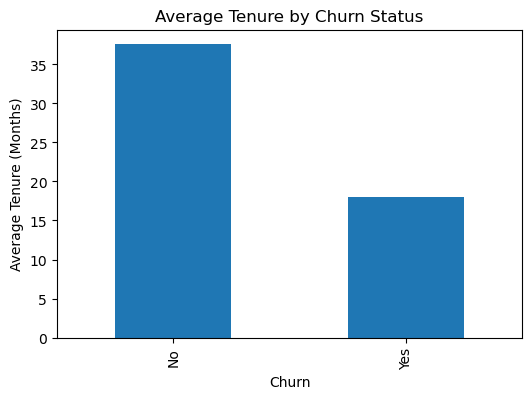

In [49]:
# Plotting tenure vs churn

# Create figure
plt.figure(figsize=(6, 4))

# Plot
mean_tenure.plot(kind="bar")

# Labels & title
plt.title("Average Tenure by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Average Tenure (Months)")

# Save figure
plt.savefig("mean_tenure_by_churn.png", dpi=300, bbox_inches="tight")

plt.show()


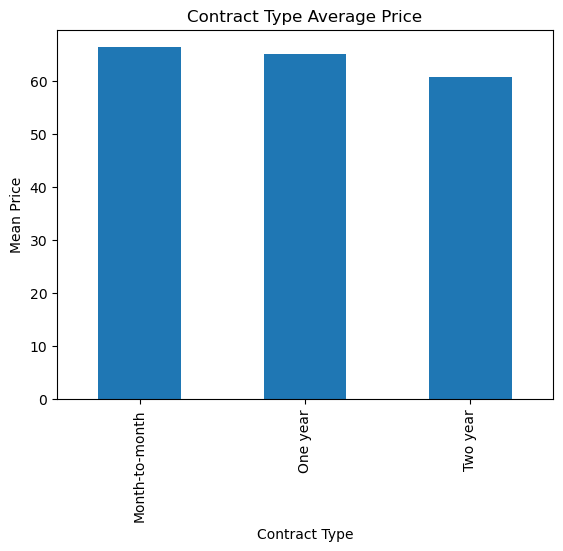

In [27]:
# Plotting the average monthly charges disaggregated by contract types.
data.groupby("Contract")["MonthlyCharges"].mean().plot(kind = "bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Price")

plt.show()

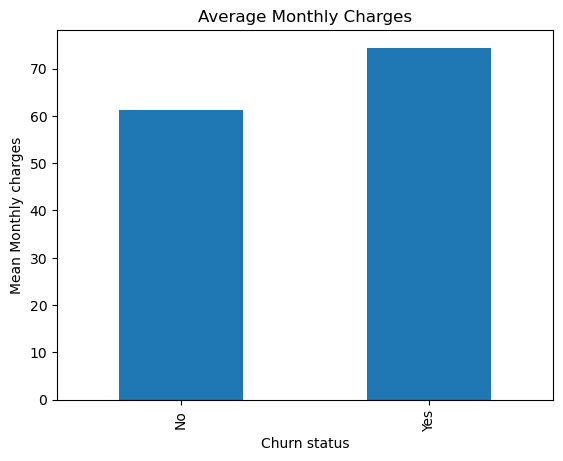

In [52]:
# Plotting the average monthly charges disaggregated by Churn status.
av_monthly_charges_by_churn = data.groupby("Churn")["MonthlyCharges"].mean().plot(kind = "bar")
plt.ylabel("Mean Monthly charges")
plt.xlabel("Churn status")
plt.title("Average Monthly Charges")

# Save figure
plt.savefig("av_monthly_charges_by_churn.png", dpi=300, bbox_inches="tight")

plt.show()

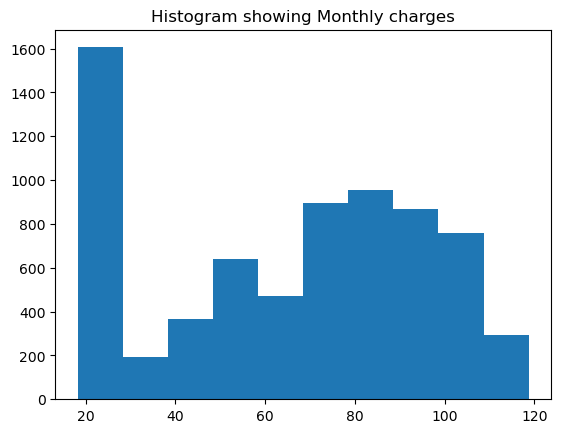

In [28]:
# Plotting the distribution of the monthly charges
plt.hist(data["MonthlyCharges"])
plt.title("Histogram showing Monthly charges")
plt.show()

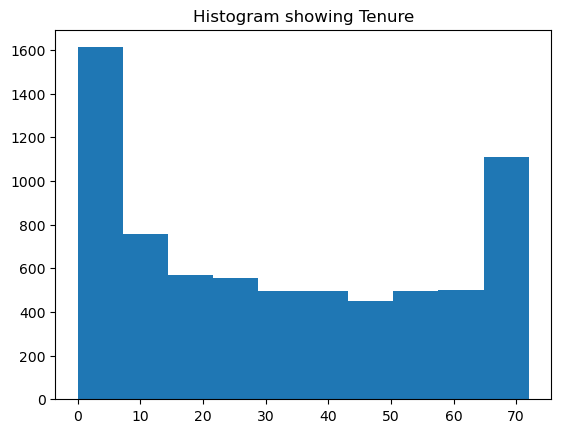

In [29]:
# Plotting a histogram to show tenure distribution
# This shows a high tenure distribution for 0 to 5 and then 65 to 75 ranges
plt.hist(data["tenure"])
plt.title("Histogram showing Tenure")
plt.show()

####  Feature engineering
 • Creating features that may explain churn
 • Customer tenure, activity levels, frequency, etc.


In [10]:
# Assessing all the columns
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
#Encoding the churn field
data.Churn =[1 if value == "Yes" else 0 for value in data.Churn]

In [11]:
# Delineating targets from features
y=data[["Churn"]]
X=data.drop(["Churn", "customerID"], axis =1)

In [13]:
#Splitting of data into 40% test and 60% train. random state used to ensure repeatability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=42)

In [14]:
#Disaggregating categorical from numerical columns
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()


#### Model training using a pipeline after endoding, scaling and instantiation of the logistic regression model

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)


pipe = Pipeline([
    ("preprocess", preprocessor),
    ("scaler", StandardScaler(with_mean=False)),
    ("model", LogisticRegression(class_weight="balanced",max_iter=1000))
])

pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'TotalCharges'])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [27]:
# Predicting with model
y_pred=pipe.predict(X_test)

#### Model evaluation

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [26]:
#evaluating model accuracy
acc= accuracy_score(y_test, y_pred) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 78.00%


In [28]:
## Examining confusion matrix
# The model is much better at predicting retained than churned
# It misses many positives (335 false negatives)

Positive class detection is weaker than negative class detection
confusion_matrix(y_test, y_pred)


array([[1784,  285],
       [ 335,  414]], dtype=int64)

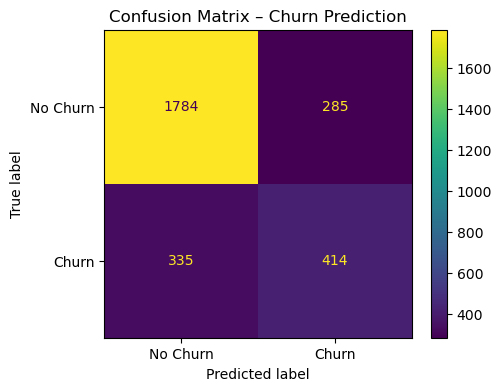

In [54]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ensure folder exists
os.makedirs("figures", exist_ok=True)

# Predictions
y_pred = pipe.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 4))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No Churn", "Churn"]
)
disp.plot(ax=ax)

ax.set_title("Confusion Matrix – Churn Prediction")

# Save
fig.savefig("figures/confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()


In [29]:
# Printing classification report
# The model performs well at predicting “No” cases but struggles with “Yes” cases, resulting in an overall accuracy of 78%
#            For retained class
# Precision: 0.84 → When the model predicts class 0, it is correct 84% of the time.
# Recall: 0.86 → It correctly identifies 86% of all actual class 0 cases.
#F1-score: 0.85 → Very strong performance.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.86      0.85      2069
         Yes       0.59      0.55      0.57       749

    accuracy                           0.78      2818
   macro avg       0.72      0.71      0.71      2818
weighted avg       0.78      0.78      0.78      2818



In [56]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate predictions
y_pred = pipe.predict(X_test)

# Create classification report as dict
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

report_df


,precision,recall,f1-score,support
No,0.841907,0.862252,0.851958,2069.000000
Yes,0.592275,0.552737,0.571823,749.000000
accuracy,0.779986,0.779986,0.779986,0.779986
macro avg,0.717091,0.707495,0.711891,2818.000000
weighted avg,0.775557,0.779986,0.777501,2818.000000


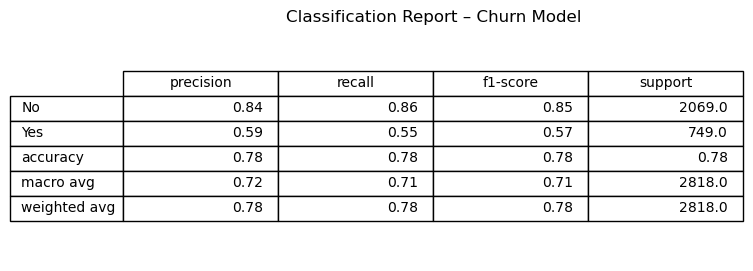

In [57]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis("off")

table = ax.table(
    cellText=report_df.round(2).values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    loc="center"
)

table.scale(1, 1.5)
ax.set_title("Classification Report – Churn Model")

fig.savefig("figures/classification_report.png", dpi=300, bbox_inches="tight")
plt.show()


In [31]:
# Examining the ROC_AUC_score
y_proba = pipe.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.4f}")


ROC-AUC: 0.8121


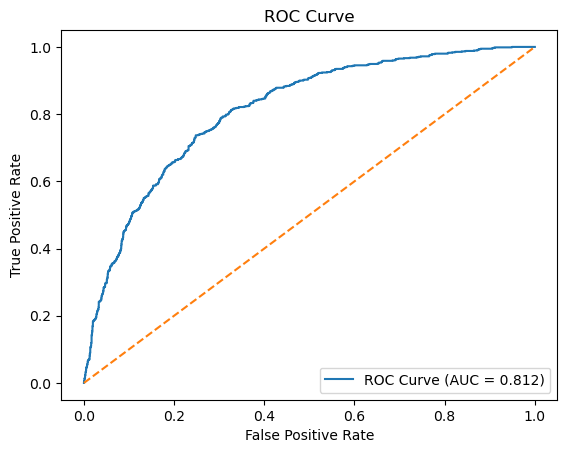

In [51]:
# Plotting the ROC_CURVE
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label="Yes")
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

# Save figure
plt.savefig("roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()



#### Overall model performance

Although Logistic Regression achieved a high ROC-AUC (0.81), recall for the positive class was modest (0.55), indicating that the default classification threshold prioritizes overall accuracy over detecting positive cases.
The model therefore performs very well at identifying non-churners; however, nearly half of churners are missed. Given the high ROC-AUC, the model has strong discriminative power, and performance can be improved by lowering the decision threshold or reweighting classes to prioritize early identification of at-risk customers.

### Model improvement
####  Hyperparameter tuning

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l1", "l2"],
    "model__solver": ["liblinear"],
    "model__class_weight": [None, "balanced"]
}

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

#Best model
grid.best_params_

best_model = grid.best_estimator_


#4. Evaluate tuned model
from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))

# Convert y_test to binary
y_test_bin = (y_test == "Yes").astype(int)

#5. Threshold tuning (often more impactful than C)

thresholds = np.arange(0.2, 0.6, 0.05)
for t in thresholds:
    preds = (y_probs >= t).astype(int)
    print(f"Threshold {t:.2f}")
    print(classification_report(y_test_bin, preds))



              precision    recall  f1-score   support

          No       0.93      0.69      0.79      2069
         Yes       0.50      0.86      0.63       749

    accuracy                           0.74      2818
   macro avg       0.72      0.77      0.71      2818
weighted avg       0.82      0.74      0.75      2818

ROC-AUC: 0.8589235462007987
Threshold 0.20
              precision    recall  f1-score   support

           0       0.98      0.32      0.48      2069
           1       0.34      0.99      0.51       749

    accuracy                           0.49      2818
   macro avg       0.66      0.65      0.49      2818
weighted avg       0.81      0.49      0.49      2818

Threshold 0.25
              precision    recall  f1-score   support

           0       0.98      0.38      0.55      2069
           1       0.36      0.98      0.53       749

    accuracy                           0.54      2818
   macro avg       0.67      0.68      0.54      2818
weighted avg    

##### The above shows a strong ROC-AUC of 0.86, the model shows good class separation, and threshold tuning reveals a clear precision–recall trade-off, where lower thresholds maximize recall for class 1 while higher thresholds improve overall accuracy and balance.

### Examining most important features in the model

In [39]:
log_reg = best_model.named_steps["model"]


In [40]:
feature_names = best_model.named_steps["preprocess"].get_feature_names_out()


In [41]:
importance = (
    pd.Series(log_reg.coef_[0], index=feature_names)
    .abs()
    .sort_values(ascending=False)
)

importance.head(10) # Calling top ten features


cat__Contract_Two year                 0.506371
num__tenure                            0.490839
cat__InternetService_Fiber optic       0.288863
cat__Contract_One year                 0.214305
num__MonthlyCharges                    0.161220
cat__OnlineSecurity_No                 0.137201
cat__PaperlessBilling_No               0.125648
cat__PhoneService_Yes                  0.108467
cat__PaymentMethod_Electronic check    0.097247
cat__TechSupport_No                    0.066385
dtype: float64

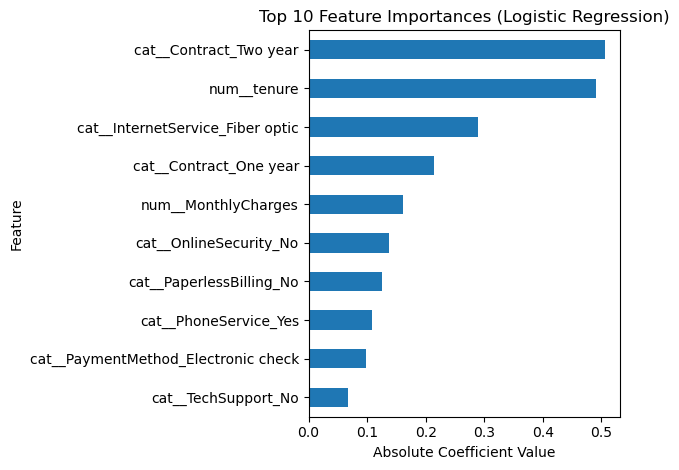

In [58]:
# Creating importance series
importance = (
    pd.Series(log_reg.coef_[0], index=feature_names)
    .abs()
    .sort_values(ascending=False)
)

# Selecting top 10 features
top_features = importance.head(10)

# Plot
plt.figure()
top_features.sort_values().plot(kind="barh")
plt.title("Top 10 Feature Importances (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()

# Save figure
plt.savefig("Features.png", dpi=300, bbox_inches="tight")

plt.show()


Finding from feature selection: Cat_contract two year, num_tenure, Cate_internetservice_fiber optic are the 3 leading features

##### Key Recommendations


Based on the model results and feature contributions, the following recommendations are proposed to Telco:

- Target Early-Tenure Customers

Customers with shorter tenure show a higher likelihood of churn. Implement onboarding and engagement programs within the first 3–6 months to improve retention.

- Review Contract Structures

Month-to-month contracts are strongly associated with churn. Incentivizing customers to move to longer-term contracts through discounts or value-added services could significantly reduce churn rates.

- Address Pricing Sensitivity

Higher monthly charges increase churn probability. Introduce personalized pricing, loyalty discounts, or bundled offers for high-risk customers.

- Improve Support and Service Add-Ons

Customers without services such as tech support or online security are more likely to churn. Bundling these services or offering free trials could improve customer stickiness.

- Use the Model for Proactive Retention

Deploy the churn model to flag high-risk customers in advance and trigger targeted retention campaigns rather than reactive responses after churn occurs.